### <font color='pink'> Code for the 'Greenery' Sub-Metric</font>

In [2]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
%matplotlib inline

parks = pd.read_csv('PittParks.csv')
neighbors = pd.read_csv('PittNeighborhoods.csv')

##### <font color='pink'>1. I first imported 'pandas' in order to use it for some of the manipulations I do of the cvs files such as mathmatical operations and file iterations. I also imported the tools I will later use for visualization. </font>
##### <font color='pink'>2. I then read through both of the csv files I am using, one of which is a list of all registered Pittsburgh parks and their corresponding sectors, and the other a list of all Pittsburgh neighborhoods and their corresponding sectors.</font>

sector
10    4.703252e+07
8     2.866169e+07
12    1.812870e+07
Name: sqft, dtype: float64


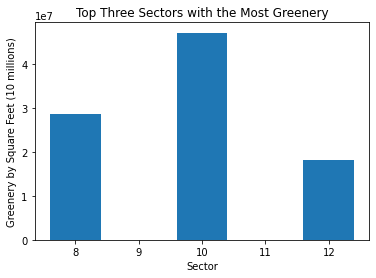

In [20]:
for index, row in parks.iterrows():
    park_sector_total = parks.groupby('sector')['sqft'].sum()
topThree = park_sector_total.nlargest(3)
print(topThree)
sector_lst = [12, 8, 10]
sqft_lst = [18128700, 28661690,47032520]
plt.bar(sector_lst, sqft_lst)
plt.title('Top Three Sectors with the Most Greenery')
plt.xlabel('Sector')
plt.ylabel('Greenery by Square Feet (10 millions)')
plt.show()

##### <font color='pink'> 3. Next, I iterated through each row of the Park csv and summed up the sizes (in square feet) of each of the parks by sector. I only printed out the maximum 3 values out of the total 16 for simplicity, as the neighborhoods with the maximum amount of greenery (measured by park size) are what we are looking for. I represent this as a bar graph for easy readability.</font>

In [3]:
hood_by_sector = neighbors.groupby(['sectors'])

##### <font color='pink'> 4. Here I move on to working with the second csv file which provides data on which sector each of the 90 Pittsburgh neighborhoods are located in. In order to work with this large file more easily, I grouped the data by sector.</font>

In [4]:
hood_by_sector[['sectors', 'hood']].get_group(10)

,sectors,hood
1,10,Squirrel Hill North
59,10,Point Breeze
80,10,Squirrel Hill South
82,10,Swisshelm Park
85,10,Regent Square


In [5]:
hood_by_sector[['sectors', 'hood']].get_group(8)

,sectors,hood
14,8,Lincoln Place
25,8,Hays
37,8,New Homestead


In [6]:
hood_by_sector[['sectors', 'hood']].get_group(12)

,sectors,hood
2,12,Garfield
11,12,East Liberty
13,12,Morningside
20,12,Larimer
36,12,Highland Park
41,12,Friendship
52,12,Bloomfield
75,12,Shadyside


##### <font color='pink'> 5. After grouping by sector, I print out the 3 sectors (and their corresponding neighborhoods) that I had previously found had the largest amount of greenery.</font>

In [9]:
park_by_sector = parks.groupby(['sector'])

##### <font color='pink'> 6. I then begin the long process of allocating which specific parks are in which specific neighborhoods by grouping the parks by sector in order to print out their exact names, as seen below this comment.</font>

In [10]:
park_by_sector[['sector', 'origpkname', 'sqft']].get_group(10)

,sector,origpkname,sqft
15,10,Windermere Circle 1 & 2,2.598780e+03
27,10,Glen Arden Triangle,3.138659e+02
60,10,Vietnam Island,1.025567e+04
64,10,Edgerton Circle,7.204733e+01
99,10,Mellon Park Island,2.926903e+04
110,10,Glen Arden Circle,4.658370e+01
118,10,Le Roi Rd Island,5.424572e+03
124,10,Saline St Passive Area,1.471427e+04
126,10,Reynolds St Planting Circle,1.651979e+03
145,10,Monitor St and St Phil Islands,3.443843e+03


In [11]:
park_by_sector[['sector', 'origpkname', 'sqft']].get_group(8)

,sector,origpkname,sqft
2,8,Revenue Park,2.041572e+04
24,8,McBride Park,9.900413e+05
37,8,Lincoln Place Parklet,2.767123e+04
112,8,Hays Parklet,5.502180e+04
179,8,Hays Woods,2.756854e+07


In [12]:
park_by_sector[['sector', 'origpkname', 'sqft']].get_group(12)

,sector,origpkname,sqft
3,12,Friendship Park,8.517818e+04
4,12,Heths Playground,2.225066e+05
13,12,Penn Circle W Triangle,3.206918e+03
21,12,Frankstown Triangle 1 & 2,1.978108e+05
32,12,Osceola Parklet,5.216117e+04
40,12,Fort Pitt Playground,4.128907e+05
54,12,Garland Parklet,1.232353e+05
58,12,Larimer Playground,6.591181e+04
62,12,Amber Triangle,4.497676e+03
73,12,Penn Circle W Square,1.298834e+03


##### <font color='pink'> 7. Due to the data above, I may now easily figure out how much square feet of park is in each neighborhood. Once again, I will only be doing this process with the top three sectors as this process pertains to the specific neighborhoods in each sector, and thus the neighborhoods in the top three are most likely to have the most greenery.</font>

##### <font color='pink'> Sector 10 <font>
    
| Squirrel Hill North | Point Breeze | Squirrel Hill South | Swisshelm Park | Regent Square |
| --- | --- | --- | --- | --- |
| Melon Park Island | Glen Arden Triangle | Vietnam Island | Windermere Circle | --- |
| Mellon Park | Edgerton Circle | Saline St Passive Area | Swisshelm Parklet | --- |
| Wightman Playground | Glen Arden Circle | Monitor St and St Phil Islands| Swisshelm War Memorial (205) | --- |
| --- | Le Roi Rd Island | Schenley Park | --- | --- |
| --- | Reynolds St Planting Circle | Davis Parklet | --- | --- |
| --- | --- | Frick Park | --- | --- |
| | | Total Square Feet Per Park | 
| 1542744.27 | 7509.04793 | 45427489.243 | 54768.267 | 0 |


##### <font color='pink'> Sector 8 <font>
| Lincoln Place | Hays | New Homestead |
| --- | --- | --- |
| McBride Park | Hays Parklet | Revenue Park |
| Lincoln Place Parklet | Hays Woods | --- |
|  | Total Square Feet Per Park | |
| 1017712.53 | 27623561.8 | 20415.72 |

##### <font color='pink'> Sector 12<font>
| Garfield | East Liberty | Morningside | Larimer | Highland Park | Friendship | Bloomfield | Shadyside |
| --- | --- | --- | --- | --- | --- | --- | --- |
| Fort Pitt Playground | Penn Circle W Triangle | --- | Frankstown Triangle 1 & 2 | Heths Playground | Friendship Park | Osceola Parklet | --- |
| Kite Hill Parklet | Penn Circle W Square | --- | Larimer Playground | Highland Ave Plant Strip | --- | Morrow Triangle | --- |
| Nelson Mandela Peace Park | Garland Parklet | --- | --- | Highland Park | --- | --- | --- |
| --- | Amber Triangle | --- | --- | --- | --- | --- | --- |
| --- | Negley Run Strip | --- | --- | --- | --- | --- | --- |
| --- | Enright Parklet | --- | --- | --- | --- | --- | --- |
| --- | Baum Negley Triangle | --- | --- | --- | --- | --- | --- |
| --- | Negley-Collins Triangle | --- | --- | --- | --- | --- | --- |
| --- |Negley Run Blvd | --- | --- | --- | --- | --- | --- |
| --- | East Liberty Strip | --- | --- | --- | --- | --- | --- |
| --- | Liberty Green Park | --- | --- | --- | --- | --- | --- |
|  |  |  | Total Square Feet Per Park |  |  |  |  |
| 466833.46 | 547946.624 | 0 | 263722.61 | 16686694.07 | 85178.18 | 78323.24 | 0 |

 <font color='pink'> 8. The three tables above are a full breakdown of the three sectors with the most greenery (parks), each neighboorhood in each of these sectors, which parks are in which neighborhoods, and finally the total square feet per park per neighborhood. In order to make this process more simple and easy, I used the following two maps:<font>

<div>
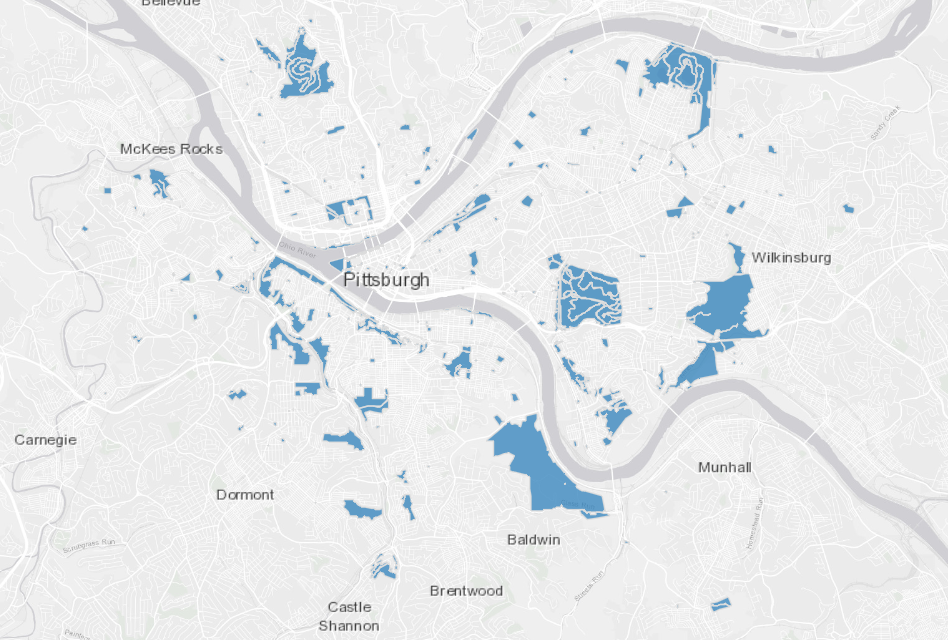
</div>
<div>
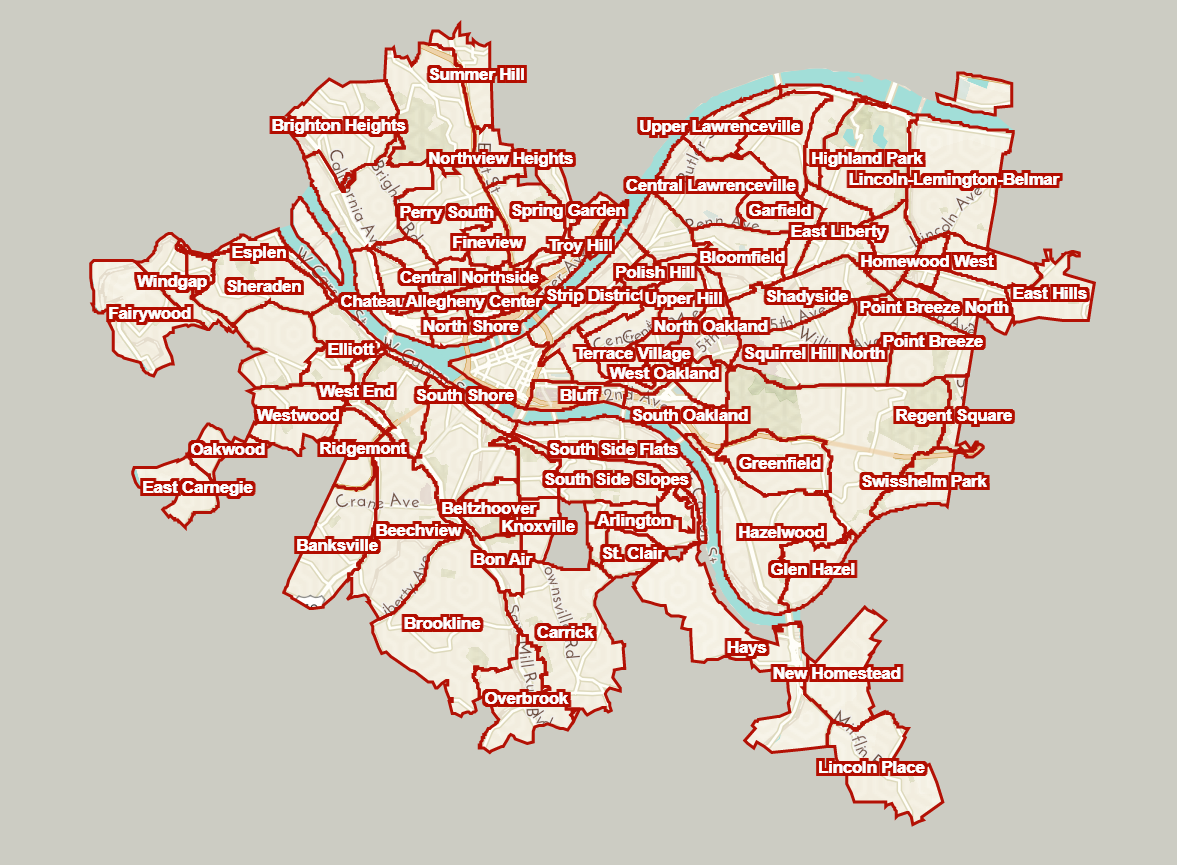
</div>

<font color='pink'> 9. In conclusion and according to all the above data, the top three neighborhoods with the most square feet of greenery(park) include: <font>
    
<font color='red'> - Squirrel Hill South (45,427,489.243 sqft)  <font>
     
<font color='red'> - Hays (27,623,561.8 sqft)  <font>
       
<font color='red'> - Highland Park (16,686,694.07 sqft)  <font>
    

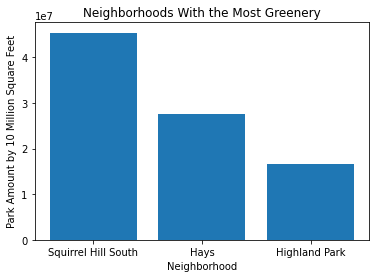

In [22]:
Neighborhood = ['Squirrel Hill South', 'Hays', 'Highland Park']
parkAmount= [45427489.243, 27623561.8, 16686694.07]

plt.bar(Neighborhood, parkAmount)
plt.title('Neighborhoods With the Most Greenery')
plt.xlabel('Neighborhood')
plt.ylabel('Park Amount by 10 Million Square Feet')
plt.show()